VGG16

Epoch 1/20


c:\Users\jing5\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 448s 570ms/step - accuracy: 0.4173 - loss: 1.6364 - val_accuracy: 0.6826 - val_loss: 0.9363
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 432s 552ms/step - accuracy: 0.6441 - loss: 1.0393 - val_accuracy: 0.7055 - val_loss: 0.8530
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 416s 531ms/step - accuracy: 0.6856 - loss: 0.9261 - val_accuracy: 0.7111 - val_loss: 0.8386
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 407s 520ms/step - accuracy: 0.7169 - loss: 0.8428 - val_accuracy: 0.7240 - val_loss: 0.8158
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 404s 516ms/step - accuracy: 0.7256 - loss: 0.8069 - val_accuracy: 0.7484 - val_loss: 0.7293
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 402s 514ms/step - accuracy: 0.7427 - loss: 0.7608 - val_accuracy: 0.7312 - val_loss: 0.7689
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 402s 513ms/step - accuracy: 0.7601 - loss: 0.7064 - val_accuracy: 0.7508 - val_loss: 0.7225
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 426s 545ms/step - accuracy: 0.7689 - loss: 0.67

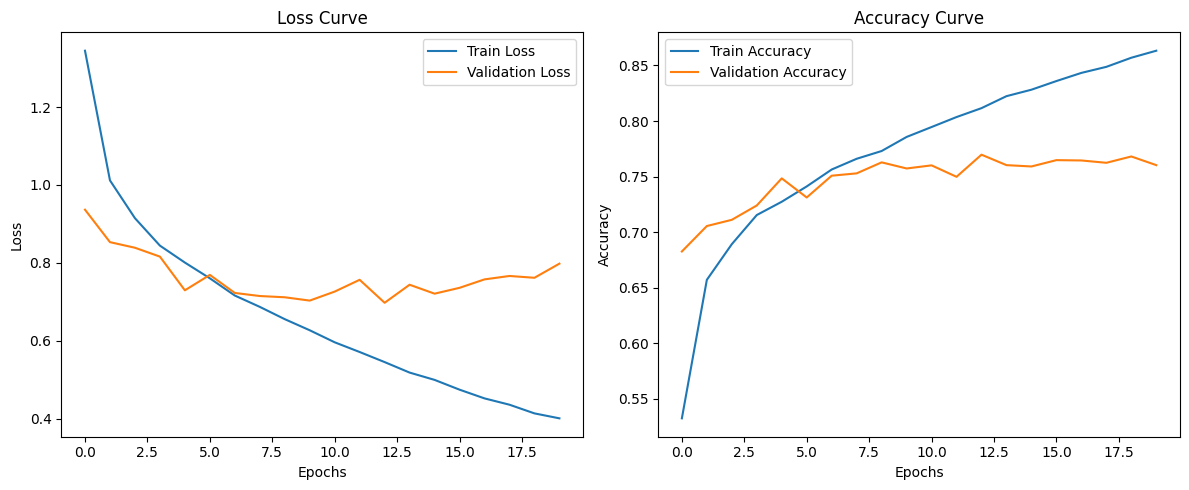

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# 1. 加載 CIFAR-10 數據集
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  # 歸一化
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)  # One-hot 編碼

# 2. 數據增強
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)
datagen.fit(X_train)

# 3. 構建 VGG16 模型
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in base_model.layers[:-4]:  # 解凍最後 4 層
    layer.trainable = False

# 4. 添加分類層
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),  # 增加神經元數量
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# 5. 編譯模型
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 6. 模型訓練
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    validation_data=(X_test, y_test),
                    epochs=20,
                    verbose=1)

# 7. 模型評估
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

# 8. 繪製訓練曲線
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

VGG19

Epoch 1/20


c:\Users\jing5\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 178s 226ms/step - accuracy: 0.3544 - loss: 1.8086 - val_accuracy: 0.5082 - val_loss: 1.3832
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 176s 225ms/step - accuracy: 0.4729 - loss: 1.4862 - val_accuracy: 0.5380 - val_loss: 1.3156
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 179s 229ms/step - accuracy: 0.4942 - loss: 1.4376 - val_accuracy: 0.5420 - val_loss: 1.2957
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 177s 226ms/step - accuracy: 0.5063 - loss: 1.3928 - val_accuracy: 0.5548 - val_loss: 1.2471
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 176s 225ms/step - accuracy: 0.5085 - loss: 1.3889 - val_accuracy: 0.5601 - val_loss: 1.2485
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 176s 225ms/step - accuracy: 0.5164 - loss: 1.3666 - val_accuracy: 0.5667 - val_loss: 1.2284
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 176s 225ms/step - accuracy: 0.5275 - loss: 1.3374 - val_accuracy: 0.5593 - val_loss: 1.2344
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 177s 226ms/step - accuracy: 0.5300 - loss: 1.33

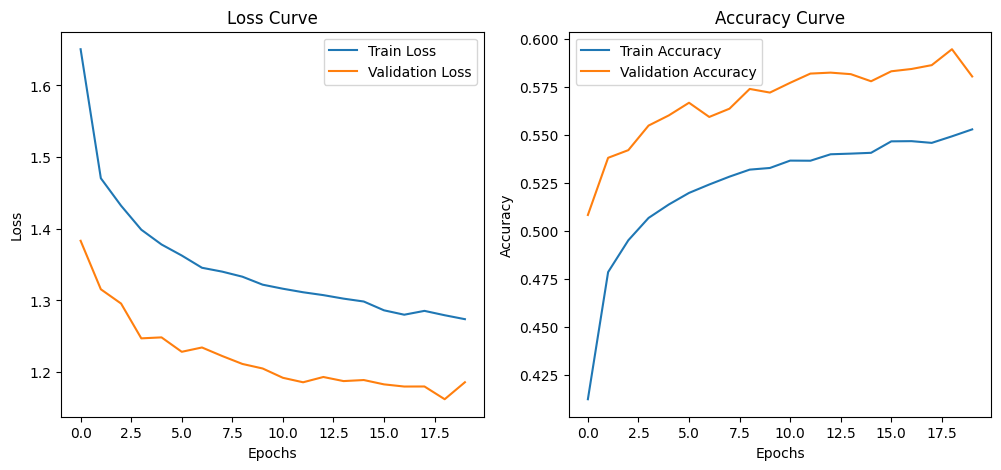

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# 1. 載入 CIFAR-10 資料集
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 2. 資料正規化
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 將標籤轉為 One-Hot 編碼
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 3. 資料增強
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

# 4. 建立 VGG19 預訓練模型
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False  # Freeze base model layers

# 自定義輸出層
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# 5. 編譯模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 6. 訓練模型
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    validation_data=(X_test, y_test),
                    epochs=20)

# 7. 評估模型
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# 8. 可視化結果
plt.figure(figsize=(12, 5))

# Loss 曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy 曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()